In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Data Processing**
* **Load dataset**
* **Looking for missing values and duplicated values**
* **Removing duplicated values**
* **Transforming categorical to numeric**

In [26]:
# Load dataset
df = pd.read_csv('election2024.csv')
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [28]:
len(df)

1600

In [29]:
df.isnull().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [30]:
df1 = df.copy()

In [31]:
job_type_mode = df1['job_type'].mode()[0]
df1['job_type'].fillna(job_type_mode, inplace=True)

company_type_mode = df1['company_type'].mode()[0]
df1['company_type'].fillna(company_type_mode, inplace=True)

In [32]:
df1.isnull().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [24]:
df1.duplicated().sum()

0

In [25]:
df1.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


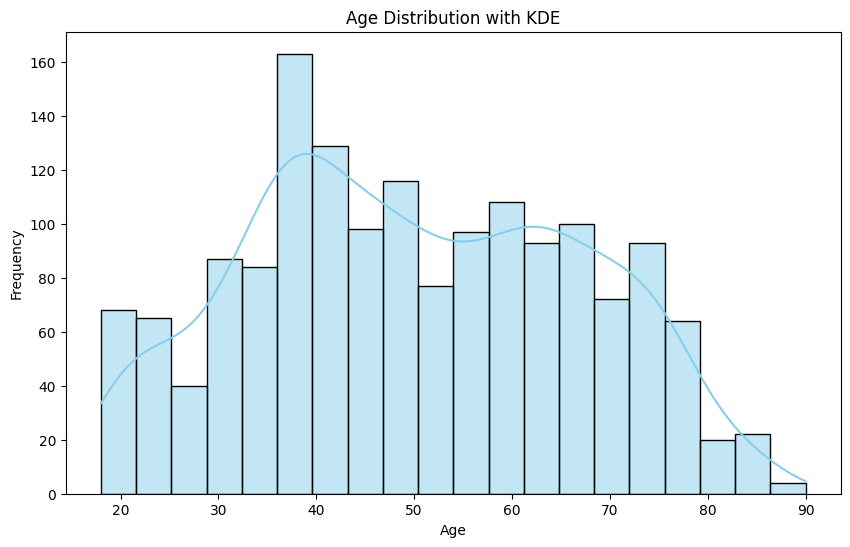

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

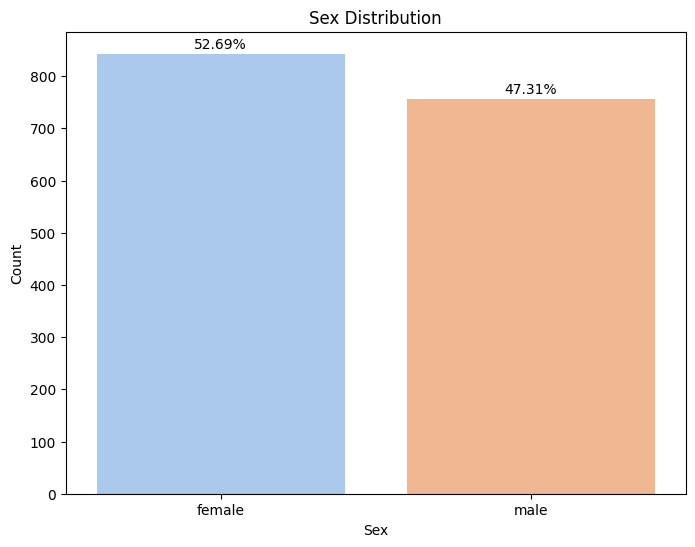

In [45]:
plt.figure(figsize=(8, 6))
sex_counts = df['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# Adding percentage labels
for i, count in enumerate(sex_counts):
    plt.text(i, count + 10, f'{(count / df.shape[0]) * 100:.2f}%', ha='center')

plt.show()


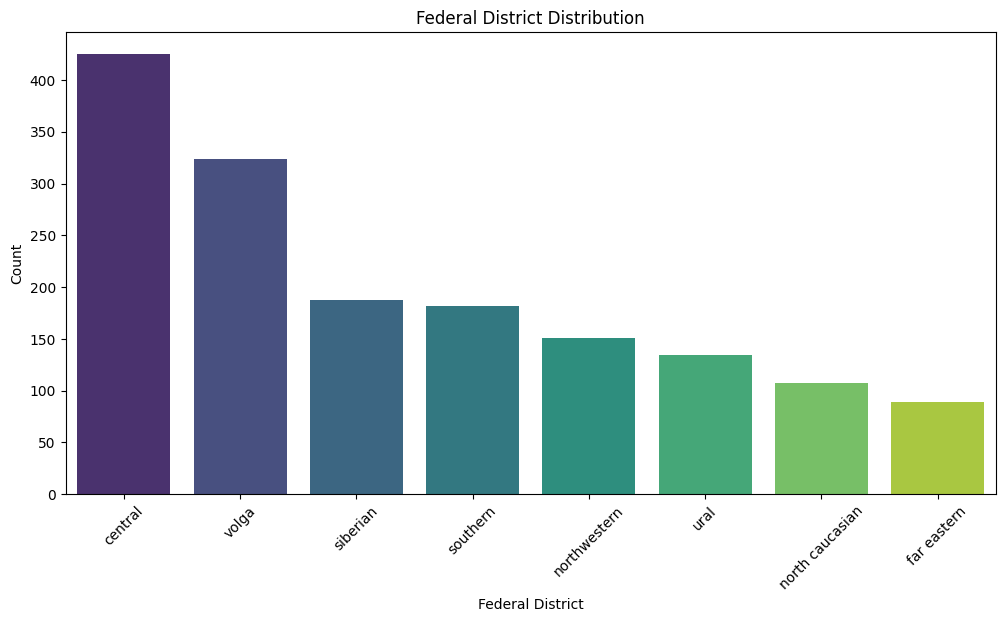

In [46]:
plt.figure(figsize=(12, 6))
federal_district_counts = df['federal_district'].value_counts().sort_values(ascending=False)
sns.barplot(x=federal_district_counts.index, y=federal_district_counts.values, palette='viridis')
plt.title('Federal District Distribution')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


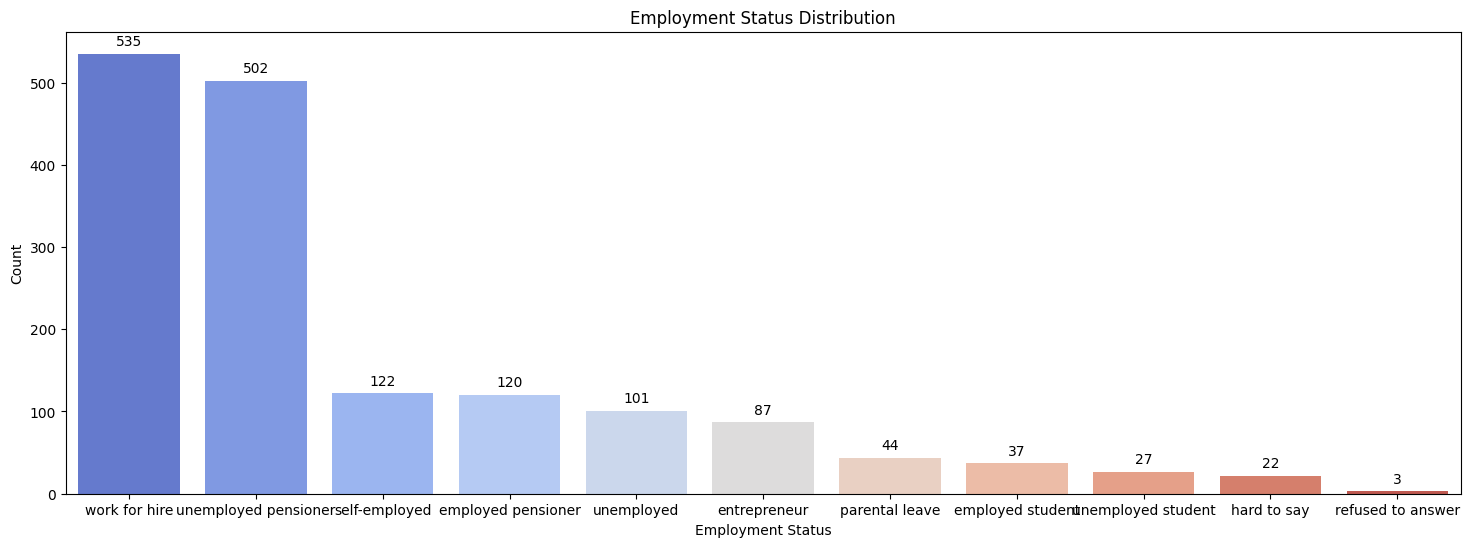

In [49]:
plt.figure(figsize=(18, 6))
employment_counts = df['employment'].value_counts()
sns.barplot(x=employment_counts.index, y=employment_counts.values, palette='coolwarm')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')

# Annotating the bars
for i, count in enumerate(employment_counts):
    plt.text(i, count + 10, f'{count}', ha='center')

plt.show()


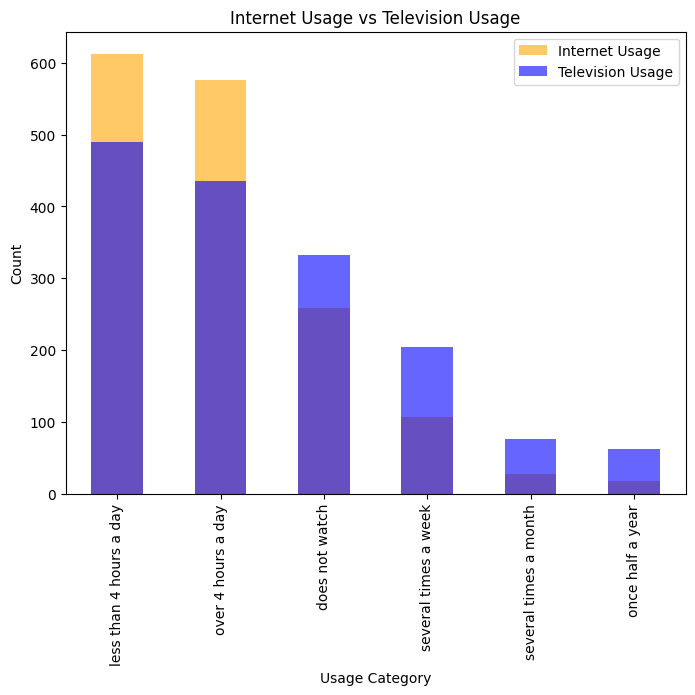

In [59]:
plt.figure(figsize=(8, 6))
df['internet_usage'].value_counts().plot(kind='bar', color='orange', alpha=0.6, label='Internet Usage')
df['television_usage'].value_counts().plot(kind='bar', color='blue', alpha=0.6, label='Television Usage')
plt.title('Internet Usage vs Television Usage')
plt.xlabel('Usage Category')
plt.ylabel('Count')
plt.legend()
plt.show()


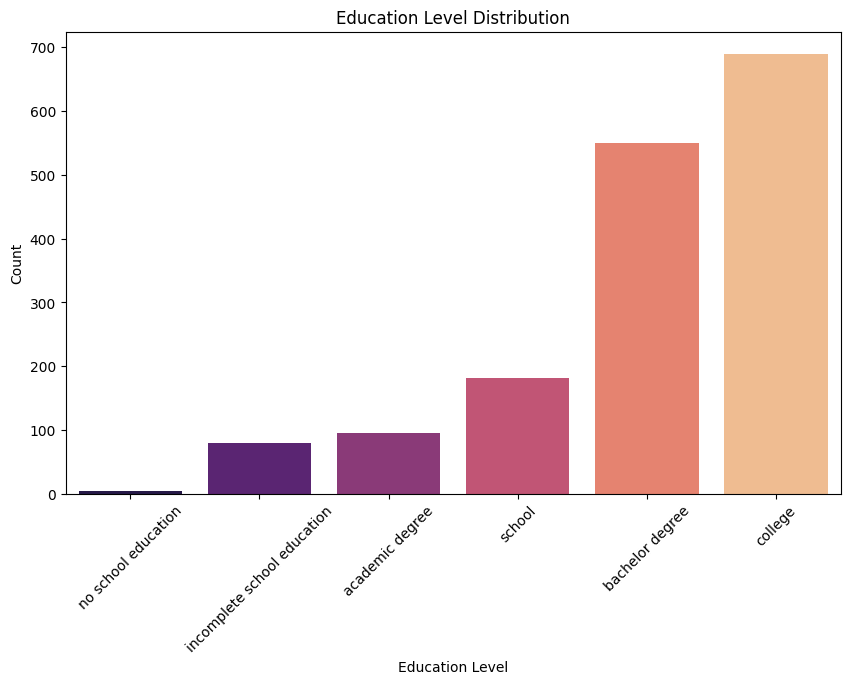

In [51]:
plt.figure(figsize=(10, 6))
education_counts = df['education'].value_counts().sort_values()
sns.barplot(x=education_counts.index, y=education_counts.values, palette='magma')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


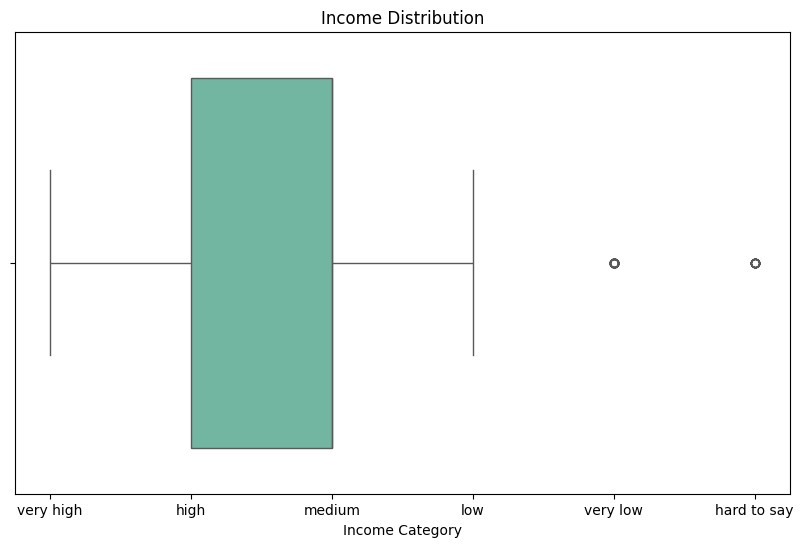

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', data=df, palette='Set2')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.show()


## Findings :
- Most people are middle aged likely in their 30s or 40s.
- There are more female voters but not by much. Data is relatively balanced.
- Central Russia has highest number of voters with Far Eastern being having least.
- There are a lot of people who work for hire and quite a few unemployed pensioners.
- There are far more people who get their news from television than internet.
- Most are college students and little to none are completely uneducated
- most people have medium to high incomes with some being low.

In [60]:

numerical_df = df[['age', 'weight1']]

correlation_matrix = numerical_df.corr()

print(correlation_matrix)


              age   weight1
age      1.000000 -0.319715
weight1 -0.319715  1.000000


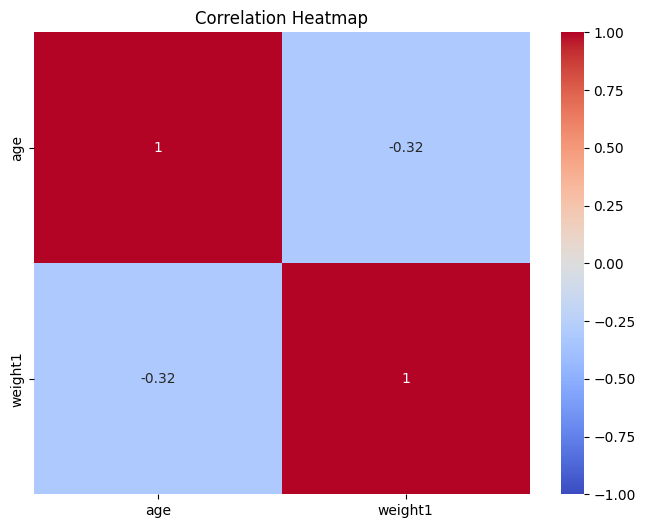

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


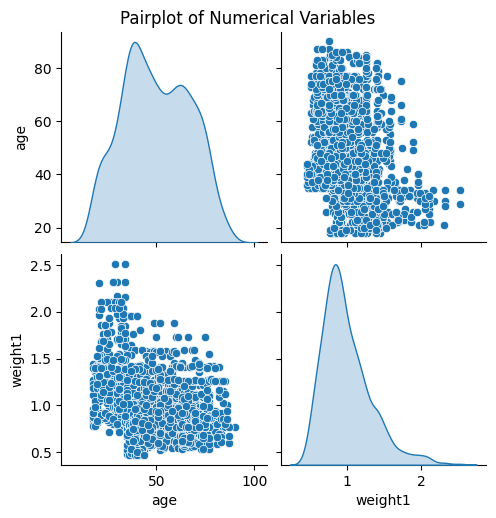

In [55]:
sns.pairplot(numerical_df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


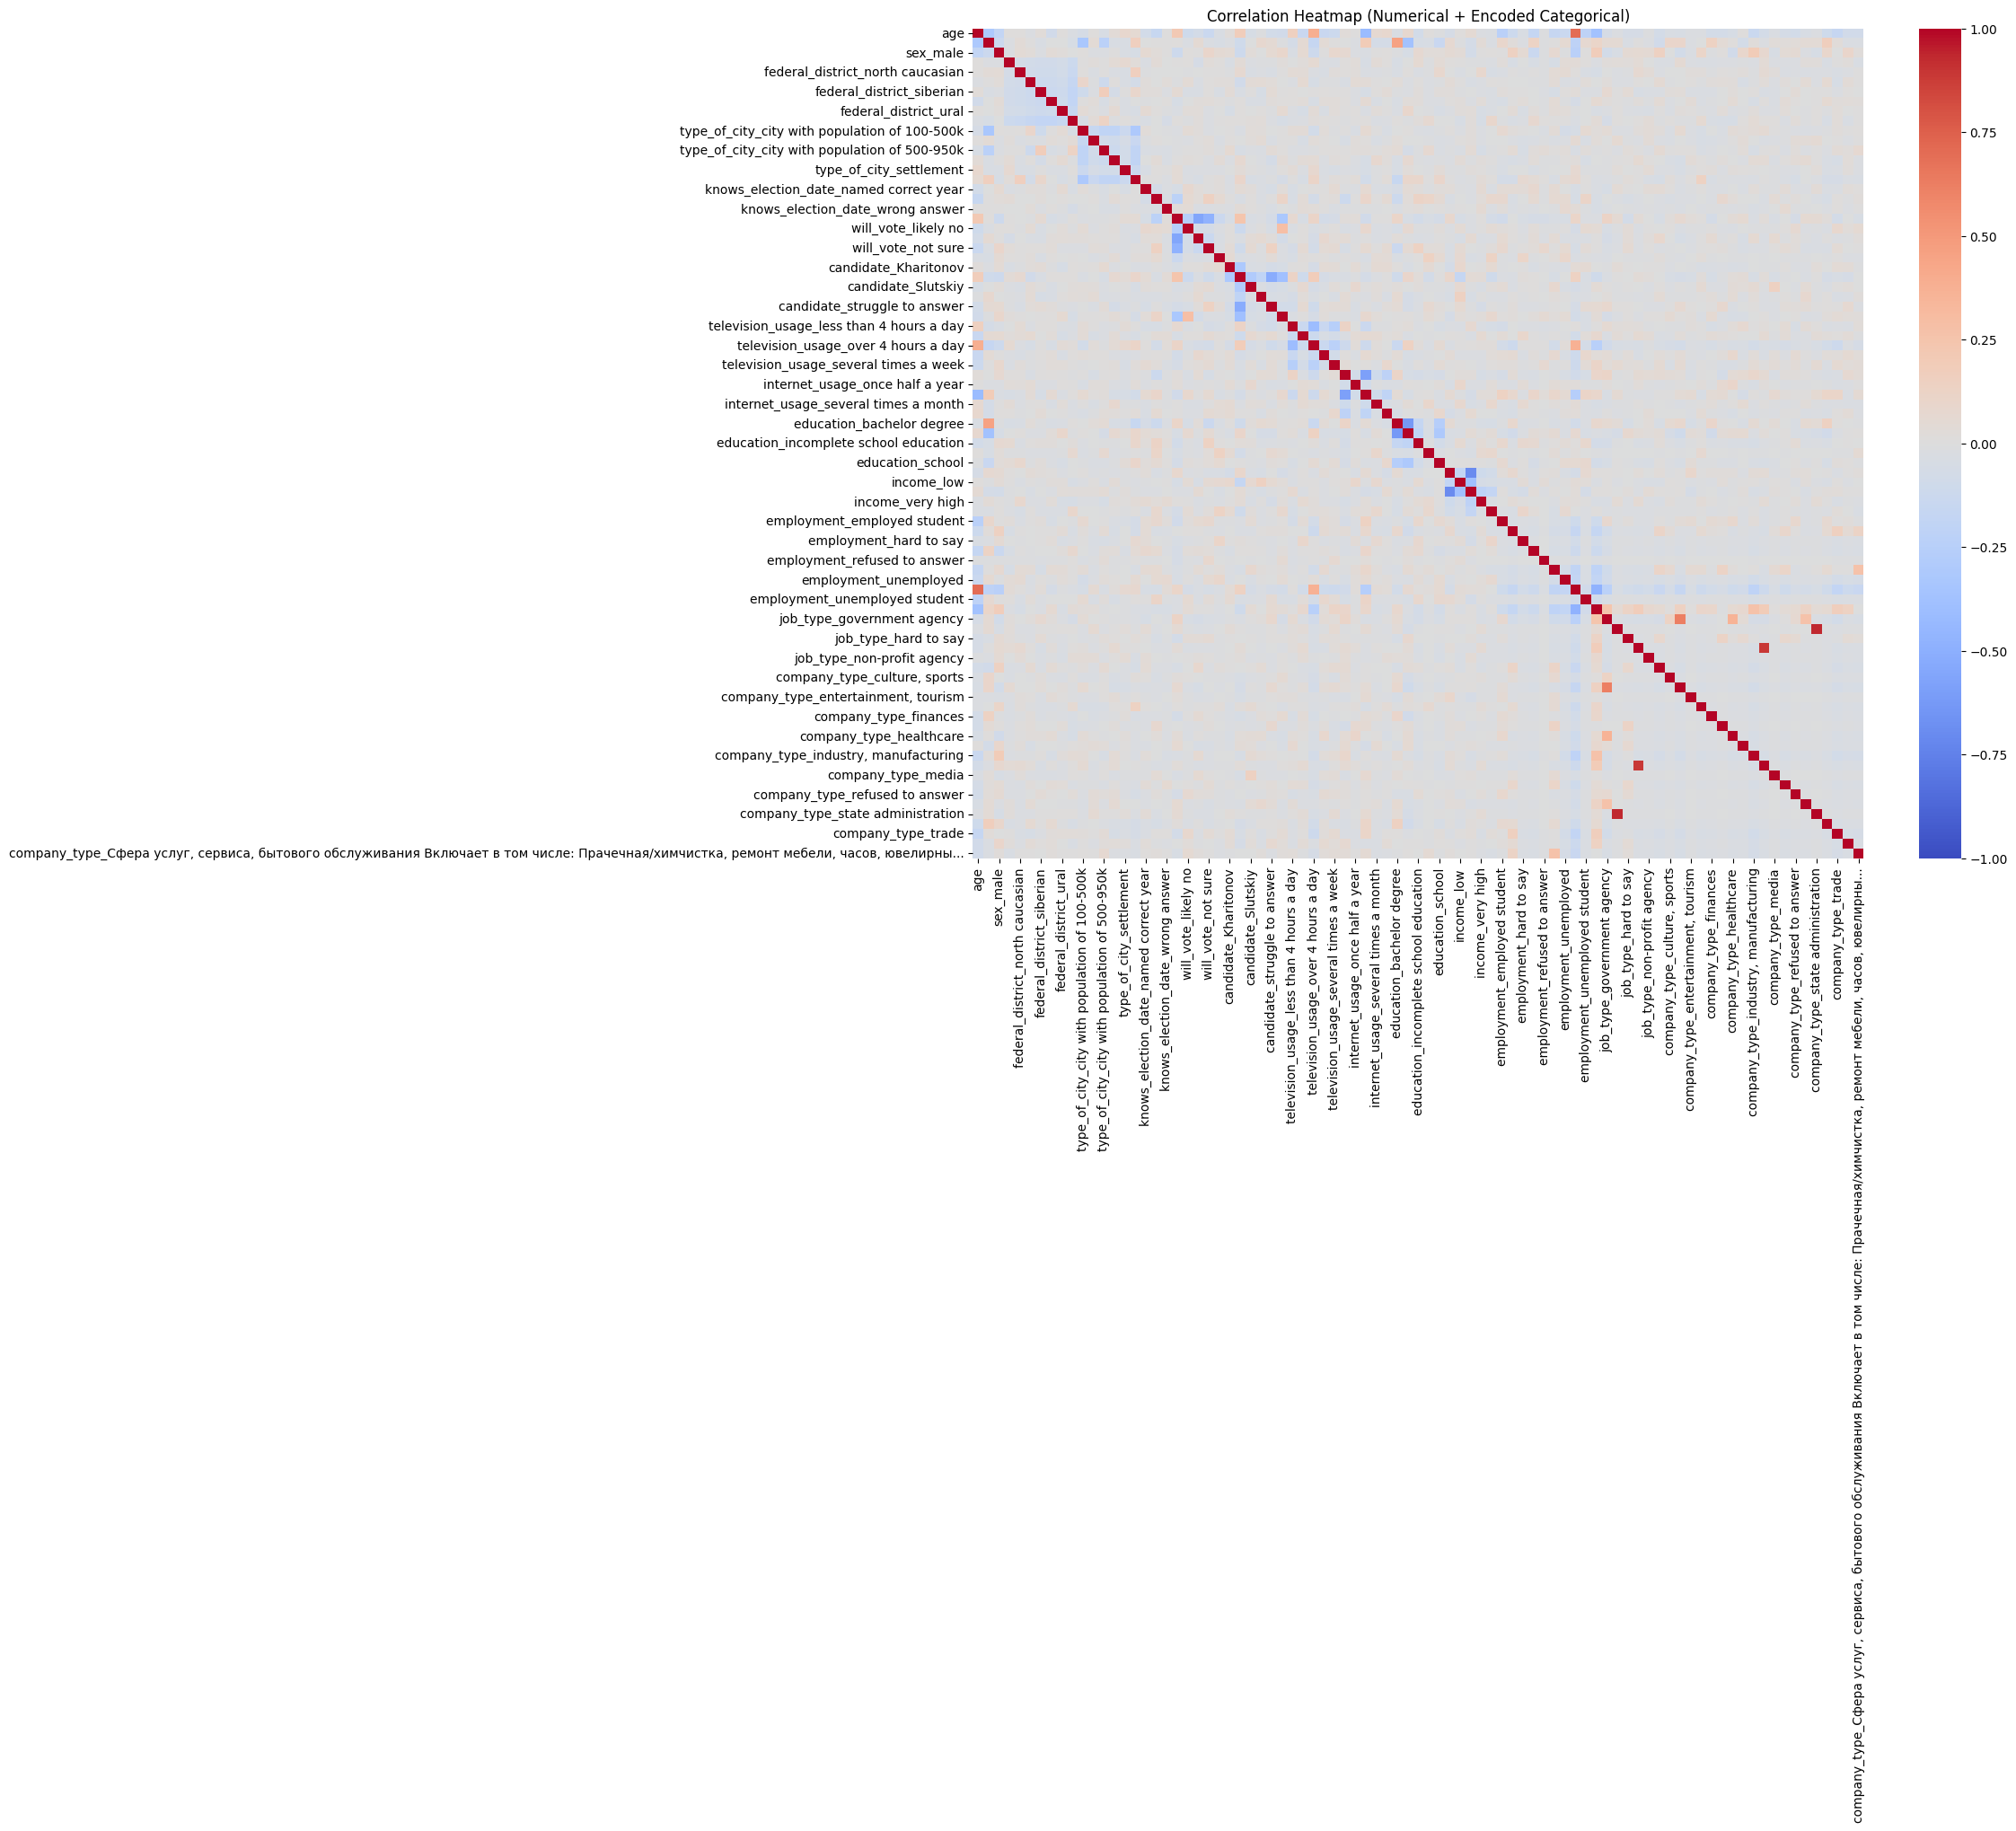

In [56]:
encoded_df = pd.get_dummies(df[['sex', 'federal_district', 'type_of_city', 'knows_election_date', 'will_vote', 'candidate', 'television_usage', 'internet_usage', 'education', 'income', 'employment', 'job_type', 'company_type']], drop_first=True)

combined_df = pd.concat([numerical_df, encoded_df], axis=1)

combined_corr_matrix = combined_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(combined_corr_matrix, cmap='coolwarm', vmax=1, vmin=-1, annot=False)
plt.title('Correlation Heatmap (Numerical + Encoded Categorical)')
plt.show()


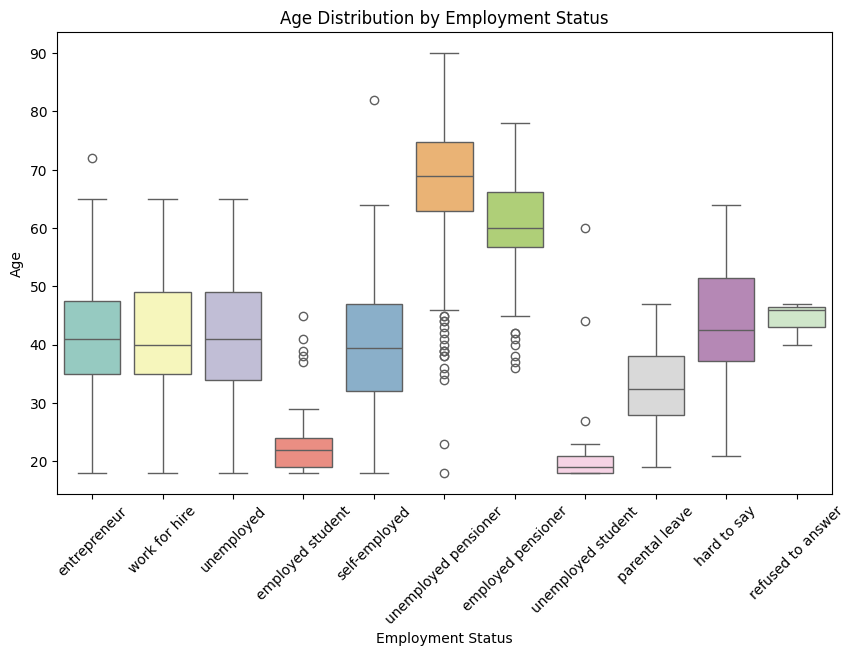

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


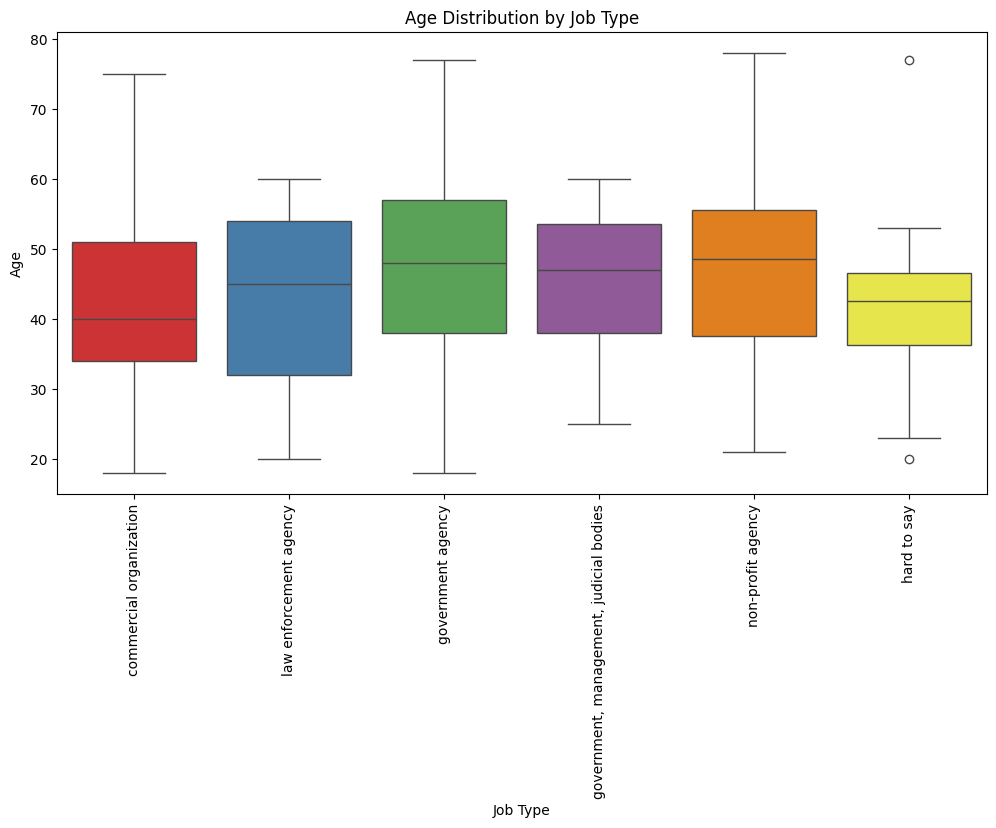

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_type', y='age', data=df, palette='Set1')
plt.title('Age Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


## Findings:
- Most unemployed pensioners are older than 60 which is to be expected.
- The people who refused to tell their jobs are in their 40s.
- Most workers are above 30 while only employed students are younger.
- All job types contain most people older than 30.